
# Deep Learning with Python

## Capítulo 6: Deep learning for text and sequences


Tipos de dados a serem trabalhados:

*   Texto (sequência de palavras ou caracteres)
*   Série temporal
*   Sequências de dados em geral

----
Algoritmos fundamentais:

*   Recurrent neural networks
*   1D convnets

----
Aplicações possíveis:

*   Classificação de documentos e timeseries, para identificação de tema ou autor
*   Comparações entre timeseries, para identificação de similaridade entre 2 documentos
*   Aprendizado sequence-to-sequence, para traduções
*   Análise de sentimentos
*   Previsão de tempo

---

Aplicações que faremos:
*   Análise de sentimentos
*   Previsão do tempo

#### Vetorizando texto:

* Segmentar o texto em palavras e transformá-las em vetores
* Segmentar o texto em caracteres e transformá-los em vetores
* Extrair n-gramas das palavras e transformá-los em vetores

#### O que são n-grams?

![N-grama](https://i.stack.imgur.com/8ARA1.png)

-----
![alt text](https://www.simplicity.be/articles/throwing-dices-recognizing-west-flemish-and-other-languages/img/ngrams.jpg)

#### Tokens e vetorização

* O processo de quebra de um texto em partes menores se chama *tokenization* e as partes em que são quebradas se chama *token*.


* Processo de *text-vectorization* consiste de aplicar a tokenização ao texto e associar vetores aos tokens.

* Usamos os vetores associados aos tokens para os modelos de deep learning.

* Os dois principais métodos de vetorização de palavras são **one-hot encoding** e **embedding**.

![alt text](https://freecontent.manning.com/wp-content/uploads/Chollet_DLfT_01.png)




## One-hot encoding

* Método mais comum e básico de vetorizar um token
* Usado no capítulo 3 para os cases do IMDB e Reuters

![alt text](https://miro.medium.com/max/2736/0*T5jaa2othYfXZX9W.)

## One-hot encoding com palavras

In [0]:
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index = {}
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index) + 1
      
max_length = 10

results = np.zeros(shape=(len(samples),
                         max_length,
                         max(token_index.values()) + 1))

for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split())) [:max_length]:
    index = token_index.get(word)
    results[i,j,index] = 1

In [0]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

## One-hot encoding com caracteres

In [0]:
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable
token_index = dict(zip(range(1,len(characters)+1), characters))

max_length = 50

results = np.zeros((len(samples), max_length, max(token_index.keys())+1))
for i, sample in enumerate(samples):
  for j, character in enumerate(sample):
    index = token_index.get(character)
    results[i,j, index] = 1

In [0]:
results

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

## One-hot encoding com o Keras

Ainda que seja possível fazer o one-hot encoding 'na mão', é recomendado que seja feito com o Keras, pois ele saberá lidar com várias issues importantes quando lidamos com texto.

In [0]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
print('Found %d unique tokens.' %len(word_index))

Found 9 unique tokens.


In [0]:
word_index

{'ate': 7,
 'cat': 2,
 'dog': 6,
 'homework': 9,
 'mat': 5,
 'my': 8,
 'on': 4,
 'sat': 3,
 'the': 1}

In [0]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [0]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

## One-hot encoding para grandes vocabulários
Quando a quantidade de tokens for suficientemente grande, vale usar o **one-hot encoding hashing trick**

> Uma função **hash** é um algoritmo que mapeia dados de comprimento variável para dados de comprimento fixo.

In [0]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = abs(hash(word)) %dimensionality
    results[i, j, index] = 1

In [0]:
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

## Embeddings

* Embeddings é uma outra maneira de vetorizar palavras através de vetores densos (oposto ao vetores esparsos do one-hot encoding). A vetorização por embedding possibilita compactar informações em vetores com menores dimensões.

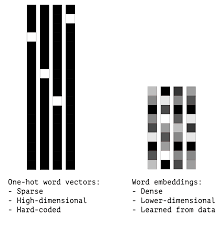

* Como fazer o embedding?
  * Aprender o embedding durante a predição, em que se inicia com vetores aleatórios e vai aprendendo com as iterações, similar aos pesos da rede neural.
  * Carregar embedding prévios

* Nos embeddings, espera-se que a distribuição espacial dos vetores tenham relação com a semântica das palavras. Palavras que possuam similaridades são esperadas como estando próximas entre si e distantes de outras categoricas e tipos.

![alt text](https://freecontent.manning.com/wp-content/uploads/Chollet_DLfT_03.png)

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/06062705/Word-Vectors.png)

> Material interessante sobre word2vec: [The Illustrated Word2vec](http://jalammar.github.io/illustrated-word2vec/)

> Embeddings com Tensorflow: [Embedding Projector
](http://projector.tensorflow.org/)

* Importante lembrar que o melhor modelo de embedding irá depender das especificidades de cada problema.

> O Keras possui uma camada própria para isso, que facilita a vida: *Embedding Layer*

In [0]:
from keras.layers import Embedding

embedding_layer = Embedding(1000,4)

A camada Embedding é uma espécie de dicionário que mapeia as índices inteiros em vetores densos.

**Word index -> Embedding layer -> Corresponding word vector**

> Precisamos de um vetor 2D de shape (samples, sequence_lenght) como entrada.

> A camada Embedding aceita sequências de diversos tamanhos, mas todos as sequências de um mesmo batch precisa ser do mesmo tamanho:
* sequências pequenas são preenchidas por zeros e sequências grandes são truncadas.

> A camada retorna uma tensor 3D (samples, sequence_length, embedding_dimensionality), que pode ser processada por uma camada RNN ou uma camada convolutiva 1D.

## IMDB Case



In [0]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20

(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)


In [0]:
x_train

array([[  65,   16,   38, ...,   19,  178,   32],
       [  23,    4, 1690, ...,   16,  145,   95],
       [1352,   13,  191, ...,    7,  129,  113],
       ...,
       [  11, 1818, 7561, ...,    4, 3586,    2],
       [  92,  401,  728, ...,   12,    9,   23],
       [ 764,   40,    4, ...,  204,  131,    9]], dtype=int32)

In [0]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))

model.add(Flatten())

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                   epochs=10,
                   batch_size=32,
                   validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 79us/step - loss: 0.6582 - acc: 0.6409 - val_loss: 0.5989 - val_acc: 0.7000
Epoch 2/10
20000/20000 [==============================] - 1s 70us/step - loss: 0.5261 - acc: 0.7546 - val_loss: 0.5183 - val_acc: 0.7324
Epoch 3/10
20000/20000 [==============================] -

> Obtivemos uma acurácia de **~75%**

> Esse modelo não leva em conta as relações entre as palavras e a estrutura da sequência.

# Próximo encontro

* Tratamento das sequências como um todo e análises de resultados
* RNN para textos

> ![alt text](https://media2.giphy.com/media/J4zA6LplubvC5weDyo/giphy.gif)

## Continuação 6.1
> 08/11

### EMBEDDINGS PRÉ-TREINADOS

- Nem sempre teremos dados de texto o suficiente para criar um embedding específico.
- Como no estudo de imagens, vale usar de embeddings criados anteriormente e que seja capaz de captar características genéricas da semântica de um idioma.
- Em geral se utiliza estudos anteriores, muitos deles produzidos pela galera de linguística (vale muito procurar trabalhos do [Grupo de Linguística Computacional](https://glicusp.wordpress.com/) da FFLCH, que tem encontros abertos a todos!)
- Modelos de embedding avançaram bastante após a criação do algoritmo de Word2Vec, que é capaz de captar as propriedades semânticas de um texto.
- Além do Word2Vec, no Keras é possível utilizar o GloVe (Global Vectors for Word Representation), que utilizaremos também

----------------------


### From raw text to word embeddings

## Transformando cada review em uma lista de strings

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
imdb_dir = r'/content/drive/My Drive/Deep_Learning/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []





In [0]:
for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

FileNotFoundError: ignored

## Vetorizando os dados

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

Using TensorFlow backend.


In [0]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 0 unique tokens.
Shape of data tensor: (0, 100)
Shape of label tensor: (0,)


In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('/content/drive/My Drive/Deep_Learning/aclImdb/teste.csv')

In [0]:
df.head()

,a,b,c
0,1,2,3
1,4,5,6
2,1,2,3
3,2,3,5
4,7,11,13
